In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import gzip
sys.path.insert(0, '../src/')
import helpers as h
%matplotlib inline

In [3]:
n_samples = 100
n_samples_fold = (n_samples+1)//2
r_slim = 1e-8
mu = 1e-7
N = 1e3
L = int(1e8)
w = int(1e3)
lim = L//(10*w)
dist = w*np.arange(lim + 1)

# Import data

## Import SLiM output

In [18]:
fn_pattern = '../simulations/slim/{}_fsel-0.0_corrmerged.txt.gz'

In [19]:
fn_slim = fn_pattern.format('sweeps')
data_slim = h.readcorr_normed(fn_slim, n_samples)
pi_slim, sfs_slim, pi_corr_slim, lolo_corr_slim, lohi_corr_slim, hihi_corr_slim = data_slim
d_slim = (2*mu) / (r_slim*pi_slim)

## Import msprime output

In [136]:
# Recombination rates
r_list = np.insert(np.logspace(-1,3,13), 0, 0.0)
# Beta coalescent alpha parameter
a_list = [2.0, 1.75, 1.5, 1.25]
# Exp growth parameter
g_list = [1.0, 2.0, 4.0, 8.0]
# Piecewise-constant growth time and factor
t_list = [0.01, 0.1, 1.0]
s_list = [0.2, 0.1, 0.05, 0.01]

In [137]:
r_list_beta = r_list[:-3]
step_beta = len(r_list_beta)
file_list_beta = ['../simulations/jsfs_a-{}_r-{}.txt'.format(a, r) for a in a_list for r in r_list[:-3]]
data = h.import_msprime_corr(file_list_beta, n_samples)
pi_beta, sfs_beta, jsfs_beta, pi_corr_beta, lolo_corr_beta, lohi_corr_beta, hihi_corr_beta = data
sfs_beta /= pi_beta[:,None]

In [138]:
r_list_exp = r_list[:-3]
step_exp = len(r_list_exp)
file_list_exp = ['../simulations/jsfs_g-{}_r-{}.txt'.format(g, r) for g in g_list for r in r_list[:-3]]
data = h.import_msprime_corr(file_list_exp, n_samples)
pi_exp, sfs_exp, jsfs_exp, pi_corr_exp, lolo_corr_exp, lohi_corr_exp, hihi_corr_exp = data
sfs_exp /= pi_exp[:,None]

In [139]:
r_list_pwc = r_list
step_pwc = len(r_list_pwc)
file_list_pwc = ['../simulations/jsfs_T-{}_S-{}_r-{}.txt'.format(t,s,r) for t in t_list for s in s_list for r in r_list]
data = h.import_msprime_corr(file_list_pwc, n_samples)
pi_pwc, sfs_pwc, jsfs_pwc, pi_corr_pwc, lolo_corr_pwc, lohi_corr_pwc, hihi_corr_pwc = data
sfs_pwc /= pi_pwc[:,None]

../src/helpers.py:71: RuntimeWarning: invalid value encountered in double_scalars
  pi_corr = (pi_sq/pi**2) - 1
../src/helpers.py:87: RuntimeWarning: invalid value encountered in double_scalars
  lolo_corr[i] = lolo/(lo**2) - 1
../src/helpers.py:88: RuntimeWarning: invalid value encountered in double_scalars
  lohi_corr[i] = lohi/(lo*hi) - 1
../src/helpers.py:89: RuntimeWarning: invalid value encountered in double_scalars
  hihi_corr[i] = hihi/(hi**2) - 1
/Users/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


# SFS

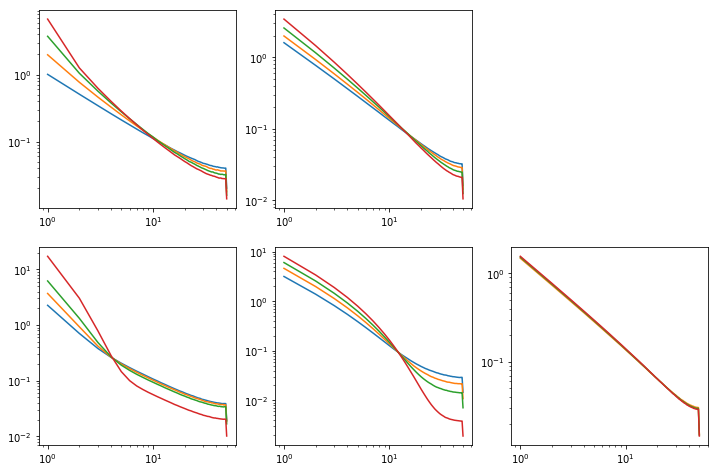

In [140]:
plt.figure(figsize=(12,8))
x = np.arange(1,n_samples_fold+1)

ax = plt.subplot(231)
for i in range(len(a_list)):
    y = sfs_beta[i*step_beta:(i+1)*step_beta]
    ax.loglog(x, np.mean(y,axis=0))
    
ax = plt.subplot(232)
for i in range(len(g_list)):
    y = sfs_exp[i*step_exp:(i+1)*step_exp]
    ax.loglog(x, np.mean(y,axis=0))

for j in range(len(t_list)):
    ax = plt.subplot(2,3,4+j)
    for i in range(len(s_list)):
        y = sfs_pwc[(j*len(s_list) + i)*step_pwc:(j*len(s_list) + (i+1))*step_pwc]
        ax.loglog(x, np.mean(y,axis=0))

# Correlations vs distance

In [170]:
cutoff = 4
xlim = [8e-2, (1/0.8)*1e2]

In [171]:
x_king = r_list_beta*pi_beta[:step_beta]/2
pi_corr_king = pi_corr_beta[:step_beta]
lolo_corr_king = lolo_corr_beta[:step_beta, cutoff-1]
lohi_corr_king = lohi_corr_beta[:step_beta, cutoff-1]
hihi_corr_king = hihi_corr_beta[:step_beta, cutoff-1]

In [176]:
x_lamb = r_list_beta*pi_beta[step_beta:2*step_beta]/2
pi_corr_lamb = pi_corr_beta[step_beta:2*step_beta]
lolo_corr_lamb = lolo_corr_beta[step_beta:2*step_beta, cutoff-1]
lohi_corr_lamb = lohi_corr_beta[step_beta:2*step_beta, cutoff-1]
hihi_corr_lamb = hihi_corr_beta[step_beta:2*step_beta, cutoff-1]
print(x_lamb)
print(pi_corr_lamb)

[  0.           0.10011535   0.21580669   0.46460329   1.0003868
   2.15484791   4.64001372   9.98036904  21.55441499  46.38707073
  99.78572033]
[ 0.24007652  0.21696159  0.19500703  0.16004321  0.11574314  0.07972558
  0.05464186  0.04124424  0.03243706  0.02882588  0.0294183 ]


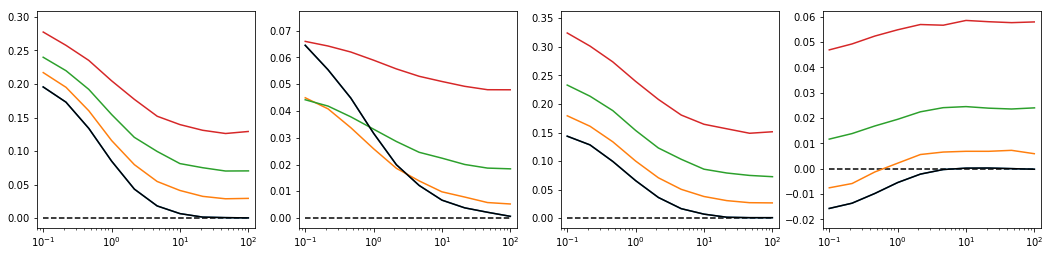

In [173]:
fig = plt.figure(figsize=(18,4))
ax1 = plt.subplot(141)
ax2 = plt.subplot(142)
ax3 = plt.subplot(143)
ax4 = plt.subplot(144)

for i in range(len(a_list)):    
    x = r_list_beta*pi_beta[i*step_beta:(i+1)*step_beta]/2
    ax1.semilogx(x, pi_corr_beta[i*step_beta:(i+1)*step_beta])    
    ax2.semilogx(x, lolo_corr_beta[i*step_beta:(i+1)*step_beta, cutoff-1])    
    ax3.semilogx(x, hihi_corr_beta[i*step_beta:(i+1)*step_beta, cutoff-1])
    ax4.semilogx(x, lohi_corr_beta[i*step_beta:(i+1)*step_beta, cutoff-1])

ax1.semilogx(x_king, pi_corr_king, 'k')
ax2.semilogx(x_king, lolo_corr_king, 'k')
ax3.semilogx(x_king, hihi_corr_king, 'k')
ax4.semilogx(x_king, lohi_corr_king, 'k')

for ax in fig.axes:
    ax.hlines(0, 1e-1, 1e2, linestyle='dashed')
    ax.set_xlim(xlim)

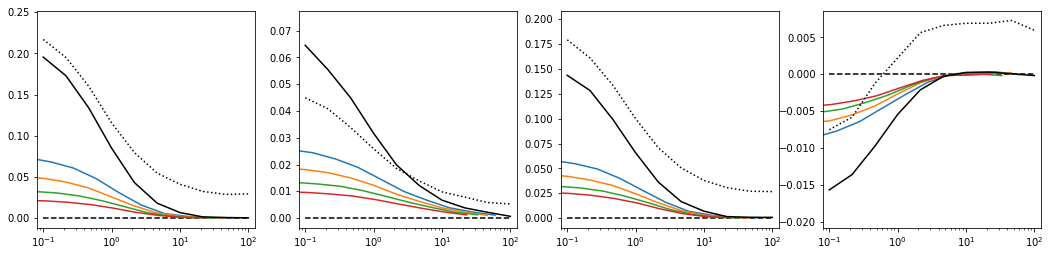

In [181]:
fig = plt.figure(figsize=(18,4))
ax1 = plt.subplot(141)
ax2 = plt.subplot(142)
ax3 = plt.subplot(143)
ax4 = plt.subplot(144)

for i in range(len(a_list)):    
    x = r_list_exp*pi_exp[i*step_exp:(i+1)*step_exp]/2
    ax1.semilogx(x, pi_corr_exp[i*step_exp:(i+1)*step_exp])    
    ax2.semilogx(x, lolo_corr_exp[i*step_exp:(i+1)*step_exp, cutoff-1])    
    ax3.semilogx(x, hihi_corr_exp[i*step_exp:(i+1)*step_exp, cutoff-1])
    ax4.semilogx(x, lohi_corr_exp[i*step_exp:(i+1)*step_exp, cutoff-1])

ax1.semilogx(x_king, pi_corr_king, 'k')
ax2.semilogx(x_king, lolo_corr_king, 'k')
ax3.semilogx(x_king, hihi_corr_king, 'k')
ax4.semilogx(x_king, lohi_corr_king, 'k')

ax1.semilogx(x_lamb, pi_corr_lamb, 'k:')
ax2.semilogx(x_lamb, lolo_corr_lamb, 'k:')
ax3.semilogx(x_lamb, hihi_corr_lamb, 'k:')
ax4.semilogx(x_lamb, lohi_corr_lamb, 'k:')

for ax in fig.axes:
    ax.hlines(0, 1e-1, 1e2, linestyle='dashed')
    ax.set_xlim(xlim)

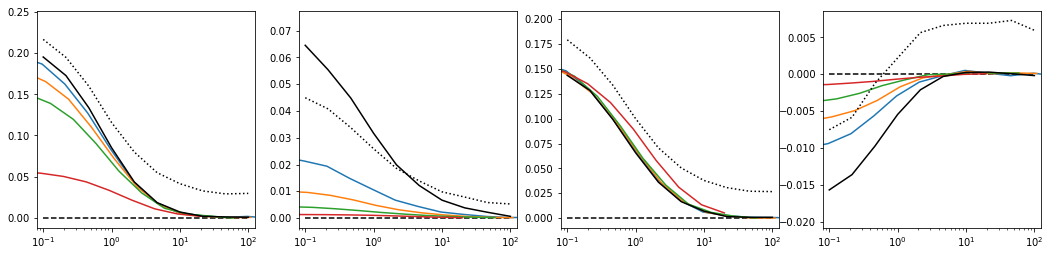

In [182]:
i_t = 0

fig = plt.figure(figsize=(18,4))
ax1 = plt.subplot(141)
ax2 = plt.subplot(142)
ax3 = plt.subplot(143)
ax4 = plt.subplot(144)

for i in range(len(s_list)):
    x = r_list_pwc*pi_pwc[i*step_pwc:(i+1)*step_pwc]/2
    ax1.semilogx(x, pi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc])    
    ax2.semilogx(x, lolo_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc, cutoff-1])    
    ax3.semilogx(x, hihi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc, cutoff-1])
    ax4.semilogx(x, lohi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc, cutoff-1])

ax1.semilogx(x_king, pi_corr_king, 'k')
ax2.semilogx(x_king, lolo_corr_king, 'k')
ax3.semilogx(x_king, hihi_corr_king, 'k')
ax4.semilogx(x_king, lohi_corr_king, 'k')

ax1.semilogx(x_lamb, pi_corr_lamb, 'k:')
ax2.semilogx(x_lamb, lolo_corr_lamb, 'k:')
ax3.semilogx(x_lamb, hihi_corr_lamb, 'k:')
ax4.semilogx(x_lamb, lohi_corr_lamb, 'k:')

for ax in fig.axes:
    ax.hlines(0, 1e-1, 1e2, linestyle='dashed')
    ax.set_xlim(xlim)

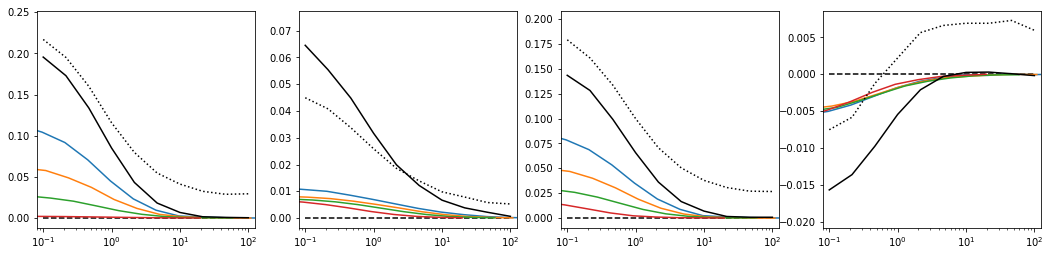

In [183]:
i_t = 1

fig = plt.figure(figsize=(18,4))
ax1 = plt.subplot(141)
ax2 = plt.subplot(142)
ax3 = plt.subplot(143)
ax4 = plt.subplot(144)

for i in range(len(s_list)):
    x = r_list_pwc*pi_pwc[i*step_pwc:(i+1)*step_pwc]/2
    ax1.semilogx(x, pi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc])    
    ax2.semilogx(x, lolo_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc, cutoff-1])    
    ax3.semilogx(x, hihi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc, cutoff-1])
    ax4.semilogx(x, lohi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc, cutoff-1])

ax1.semilogx(x_king, pi_corr_king, 'k')
ax2.semilogx(x_king, lolo_corr_king, 'k')
ax3.semilogx(x_king, hihi_corr_king, 'k')
ax4.semilogx(x_king, lohi_corr_king, 'k')

ax1.semilogx(x_lamb, pi_corr_lamb, 'k:')
ax2.semilogx(x_lamb, lolo_corr_lamb, 'k:')
ax3.semilogx(x_lamb, hihi_corr_lamb, 'k:')
ax4.semilogx(x_lamb, lohi_corr_lamb, 'k:')

for ax in fig.axes:
    ax.hlines(0, 1e-1, 1e2, linestyle='dashed')
    ax.set_xlim(xlim)

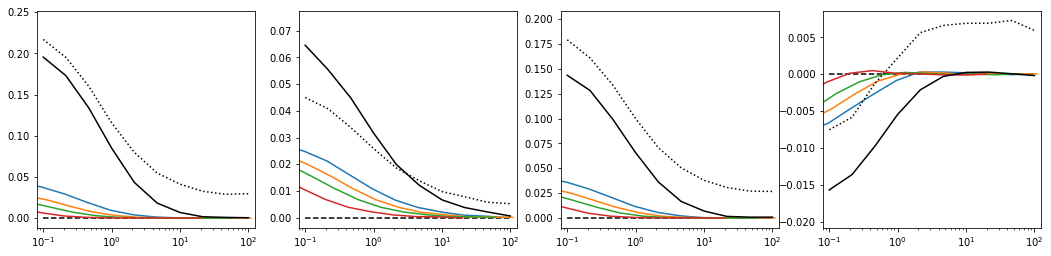

In [184]:
i_t = 2

fig = plt.figure(figsize=(18,4))
ax1 = plt.subplot(141)
ax2 = plt.subplot(142)
ax3 = plt.subplot(143)
ax4 = plt.subplot(144)

for i in range(len(s_list)):
    x = r_list_pwc*pi_pwc[i*step_pwc:(i+1)*step_pwc]/2
    ax1.semilogx(x, pi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc])    
    ax2.semilogx(x, lolo_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc, cutoff-1])    
    ax3.semilogx(x, hihi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc, cutoff-1])
    ax4.semilogx(x, lohi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc, cutoff-1])

ax1.semilogx(x_king, pi_corr_king, 'k')
ax2.semilogx(x_king, lolo_corr_king, 'k')
ax3.semilogx(x_king, hihi_corr_king, 'k')
ax4.semilogx(x_king, lohi_corr_king, 'k')

ax1.semilogx(x_lamb, pi_corr_lamb, 'k:')
ax2.semilogx(x_lamb, lolo_corr_lamb, 'k:')
ax3.semilogx(x_lamb, hihi_corr_lamb, 'k:')
ax4.semilogx(x_lamb, lohi_corr_lamb, 'k:')

for ax in fig.axes:
    ax.hlines(0, 1e-1, 1e2, linestyle='dashed')
    ax.set_xlim(xlim)

# Correlations vs $\pi$ correlations

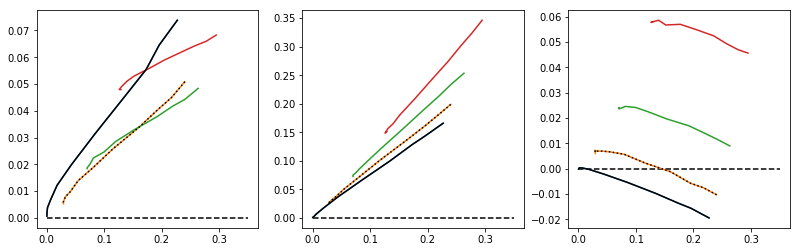

In [185]:
fig = plt.figure(figsize=(18*(3/4),4))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

for i in range(len(a_list)):    
    ax1.plot(pi_corr_beta[i*step_beta:(i+1)*step_beta], lolo_corr_beta[i*step_beta:(i+1)*step_beta, cutoff-1])    
    ax2.plot(pi_corr_beta[i*step_beta:(i+1)*step_beta], hihi_corr_beta[i*step_beta:(i+1)*step_beta, cutoff-1])    
    ax3.plot(pi_corr_beta[i*step_beta:(i+1)*step_beta], lohi_corr_beta[i*step_beta:(i+1)*step_beta, cutoff-1])    

ax1.plot(pi_corr_king, lolo_corr_king, 'k')
ax2.plot(pi_corr_king, hihi_corr_king, 'k')
ax3.plot(pi_corr_king, lohi_corr_king, 'k')


for ax in fig.axes:
    ax.hlines(0, 0, 0.35, linestyle='dashed')

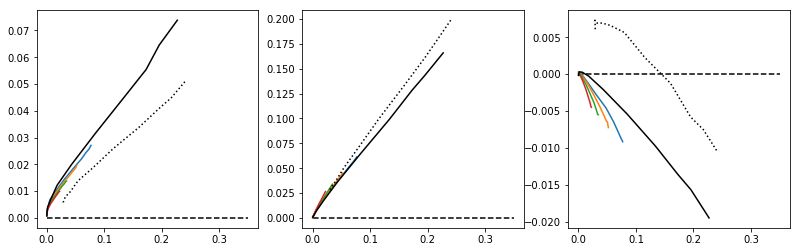

In [186]:
fig = plt.figure(figsize=(18*(3/4),4))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

for i in range(len(a_list)):    
    ax1.plot(pi_corr_exp[i*step_exp:(i+1)*step_exp], lolo_corr_exp[i*step_exp:(i+1)*step_exp, cutoff-1])    
    ax2.plot(pi_corr_exp[i*step_exp:(i+1)*step_exp], hihi_corr_exp[i*step_exp:(i+1)*step_exp, cutoff-1])    
    ax3.plot(pi_corr_exp[i*step_exp:(i+1)*step_exp], lohi_corr_exp[i*step_exp:(i+1)*step_exp, cutoff-1])    

ax1.plot(pi_corr_king, lolo_corr_king, 'k')
ax2.plot(pi_corr_king, hihi_corr_king, 'k')
ax3.plot(pi_corr_king, lohi_corr_king, 'k')


ax1.plot(pi_corr_lamb, lolo_corr_lamb, 'k:')
ax2.plot(pi_corr_lamb, hihi_corr_lamb, 'k:')
ax3.plot(pi_corr_lamb, lohi_corr_lamb, 'k:')

for ax in fig.axes:
    ax.hlines(0, 0, 0.35, linestyle='dashed')

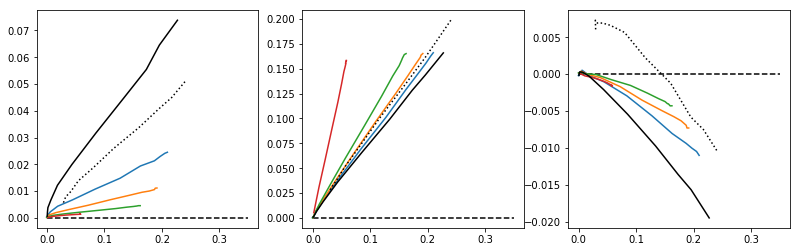

In [187]:
i_t = 0

fig = plt.figure(figsize=(18*(3/4),4))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

for i in range(len(s_list)):
    ax1.plot(pi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc], 
            lolo_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc, cutoff-1])    
    ax2.plot(pi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc], 
            hihi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc, cutoff-1])    
    ax3.plot(pi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc], 
            lohi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc, cutoff-1])    

ax1.plot(pi_corr_king, lolo_corr_king, 'k')
ax2.plot(pi_corr_king, hihi_corr_king, 'k')
ax3.plot(pi_corr_king, lohi_corr_king, 'k')


ax1.plot(pi_corr_lamb, lolo_corr_lamb, 'k:')
ax2.plot(pi_corr_lamb, hihi_corr_lamb, 'k:')
ax3.plot(pi_corr_lamb, lohi_corr_lamb, 'k:')

for ax in fig.axes:
    ax.hlines(0, 0, 0.35, linestyle='dashed')

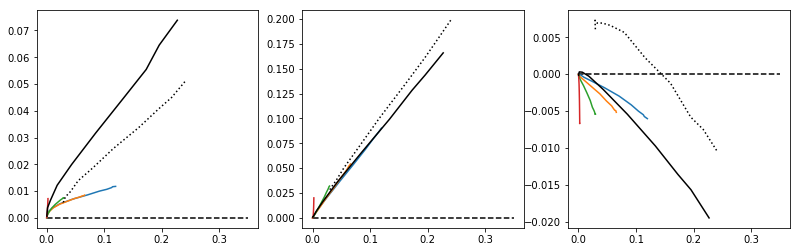

In [188]:
i_t = 1

fig = plt.figure(figsize=(18*(3/4),4))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

for i in range(len(s_list)):
    ax1.plot(pi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc], 
            lolo_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc, cutoff-1])    
    ax2.plot(pi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc], 
            hihi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc, cutoff-1])    
    ax3.plot(pi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc], 
            lohi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc, cutoff-1])    

ax1.plot(pi_corr_king, lolo_corr_king, 'k')
ax2.plot(pi_corr_king, hihi_corr_king, 'k')
ax3.plot(pi_corr_king, lohi_corr_king, 'k')

ax1.plot(pi_corr_lamb, lolo_corr_lamb, 'k:')
ax2.plot(pi_corr_lamb, hihi_corr_lamb, 'k:')
ax3.plot(pi_corr_lamb, lohi_corr_lamb, 'k:')

for ax in fig.axes:
    ax.hlines(0, 0, 0.35, linestyle='dashed')

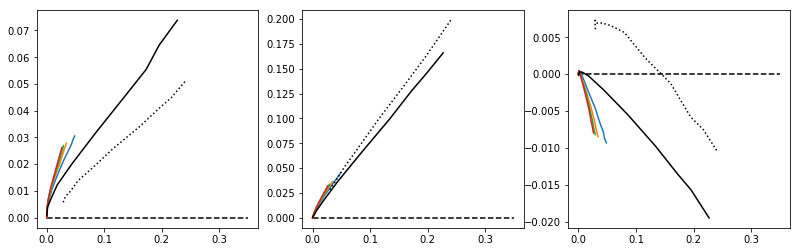

In [189]:
i_t = 2

fig = plt.figure(figsize=(18*(3/4),4))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

for i in range(len(s_list)):
    ax1.plot(pi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc], 
            lolo_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc, cutoff-1])    
    ax2.plot(pi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc], 
            hihi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc, cutoff-1])    
    ax3.plot(pi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc], 
            lohi_corr_pwc[(i_t*len(s_list)+i)*step_pwc:(i_t*len(s_list)+i+1)*step_pwc, cutoff-1])    

ax1.plot(pi_corr_king, lolo_corr_king, 'k')
ax2.plot(pi_corr_king, hihi_corr_king, 'k')
ax3.plot(pi_corr_king, lohi_corr_king, 'k')

ax1.plot(pi_corr_lamb, lolo_corr_lamb, 'k:')
ax2.plot(pi_corr_lamb, hihi_corr_lamb, 'k:')
ax3.plot(pi_corr_lamb, lohi_corr_lamb, 'k:')

for ax in fig.axes:
    ax.hlines(0, 0, 0.35, linestyle='dashed')